In [77]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import imageio
import random
import os

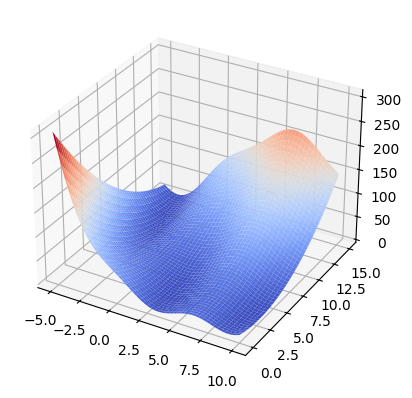

In [132]:
def Branin_Function(vec):   #min
    x = vec[0]
    y = vec[1]
    a = 1
    b = 5.1/(4*np.pow(np.pi, 2))
    c = 5/np.pi
    r = 6
    s = 10
    t = 1/(8*np.pi)
    
    return a*np.pow(y - b*np.pow(x, 2) + c*x - r, 2) + s*(1 - t)*np.cos(x) + s

Branin_x = np.linspace(-5, 10, 1000)
Branin_y = np.linspace(0, 15, 1000)
Branin_x, Branin_y = np.meshgrid(Branin_x, Branin_y)
Branin_z = Branin_Function([Branin_x, Branin_y])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Branin_x, Branin_y, Branin_z, cmap=cm.coolwarm)

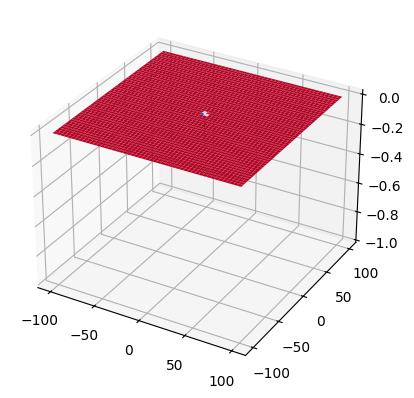

In [ ]:
def Easom_Function(vec):    #min
    x = vec[0]
    y = vec[1]
    
    return -np.cos(x)*np.cos(y)*np.exp(-np.pow(x - np.pi, 2) - np.pow(y - np.pi, 2))

Easom_x = np.linspace(-100, 100, 1000)
Easom_y = np.linspace(-100, 100, 1000)
Easom_x, Easom_y = np.meshgrid(Easom_x, Easom_y)
Easom_z = Easom_Function([Easom_x, Easom_y])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Easom_x, Easom_y, Easom_z, cmap=cm.coolwarm)

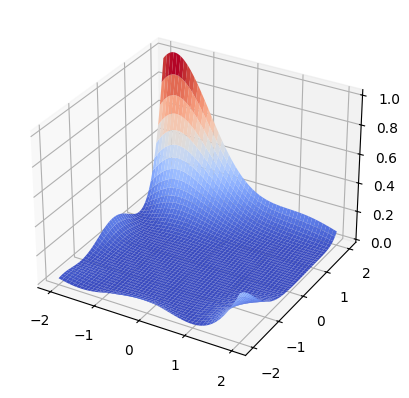

In [ ]:
def GP_Function(vec):   #min
    x = vec[0]
    y = vec[1]
    
    return (1 + np.pow(x + y + 1, 2)*(19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2))*(30 + np.pow(2*x - 3*y, 2)*(18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))

GP_x = np.linspace(-2, 2, 1000)
GP_y = np.linspace(-2, 2, 1000)
GP_x, GP_y = np.meshgrid(GP_x, GP_y)
GP_z = GP_Function([GP_x, GP_y])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(GP_x, GP_y, GP_z, cmap=cm.coolwarm)

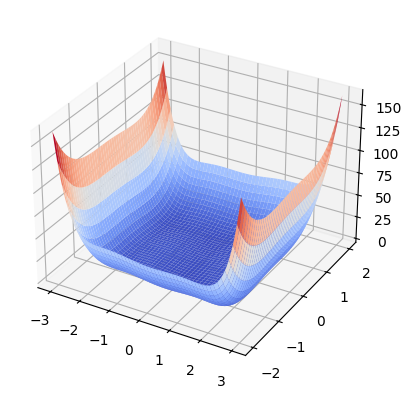

In [182]:
def shC_Function(vec):  #min
    x = vec[0]
    y = vec[1]
    
    return (4 - 2.1*np.pow(x, 2) + np.pow(x, 4)/3)*np.pow(x, 2) + x*y + (-4 + 4*np.pow(y, 2))*np.pow(y, 2)

shC_x = np.linspace(-3, 3, 1000)
shC_y = np.linspace(-2, 2, 1000)
shC_x, shC_y = np.meshgrid(shC_x, shC_y)
shC_z = shC_Function([shC_x, shC_y])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(shC_x, shC_y, shC_z, cmap=cm.coolwarm)

In [82]:
def create_initial_population(population_size, chromosome_length):
    return np.random.randint(1 << chromosome_length, size=(population_size, 2))

In [83]:
def select_parents(populations, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(populations)):
        tournament = random.sample(list(zip(populations, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

In [84]:
def crossover(parent1, parent2, chromosome_length):
    cross = np.random.randint(1, chromosome_length - 1)
    
    child1 = (((parent1[0] >> cross) << cross) ^ (parent2[0] & ((1 << cross) - 1)), 
              ((parent1[1] >> cross) << cross) ^ (parent2[1] & ((1 << cross) - 1)))
    
    child2 = (((parent2[0] >> cross) << cross) ^ (parent1[0] & ((1 << cross) - 1)), 
              ((parent1[1] >> cross) << cross) ^ (parent2[1] & ((1 << cross) - 1)))
    return child1, child2

In [85]:
def mutation(individual, mutation_rate, chromosome_length):
    individual = list(individual)
    for i in range(chromosome_length):
        if np.random.random() < mutation_rate:
            individual[0] ^= 1 << i
        if np.random.random() < mutation_rate:
            individual[1] ^= 1 << i
    return tuple(individual)

In [166]:
def genetic_algorithm(population_size: int, chromosome_length: int, generations: int, mutation_rate: float, 
                      ffunction, a1: float, b1: float, a2: float, b2: float, save_gif: bool = False, search_minimum=False, fps=2):
    
    populations = create_initial_population(population_size, chromosome_length)
    images = []
    bf = []
    
    x_values = np.linspace(a1, b1, 1000)
    y_values = np.linspace(a2, b2, 1000)
    x_values, y_values = np.meshgrid(x_values, y_values)
    z_values = ffunction([x_values, y_values])
    
    
    def fitness_function(p):
        x = p[0] / (2 << chromosome_length - 1) * (b1 - a1) + a1
        y = p[1] / (2 << chromosome_length - 1) * (b2 - a2) + a2
        if search_minimum:
            return -ffunction([x, y])
        else:
            return ffunction([x, y])
    
    for generation in range(generations):
        fitnesses = [fitness_function(p) for p in populations]
        
        best_individual = max(populations, key=fitness_function)
        best_fitness = fitness_function(best_individual)
        
        if search_minimum:
            bf.append(-best_fitness)
        else:
            bf.append(best_fitness)
        
        # print(f"Generation: {generation}|BI: {best_individual}, BF: {best_fitness}")
        
        if save_gif:
            
            fig = plt.figure(figsize=plt.figaspect(0.5))
            if search_minimum:
                fig.suptitle(f'Best value: {-best_fitness}')
            else:
                fig.suptitle(f'Best value: {best_fitness}')
            
            ax = fig.add_subplot(1, 2, 1, projection='3d')
            ax.plot_surface(x_values, y_values, z_values, cmap=cm.coolwarm)
            
            population_x = [p[0] / (2 << chromosome_length - 1) * (b1 - a1) + a1 for p in populations]
            population_y = [p[1] / (2 << chromosome_length - 1) * (b2 - a2) + a2 for p in populations]
            population_z = ffunction([np.array(population_x), np.array(population_y)])
            ax.scatter(population_x, population_y, population_z, color="black")
            
            ax = fig.add_subplot(1, 2, 2)
            ax.contourf(x_values, y_values, z_values)
            ax.scatter(population_x, population_y, color='red', label="Population")
            ax.set_title(f"Generation {generation}")
            ax.set_xlabel("x")
            ax.set_ylabel("Fitness")
            ax.legend()
            
            
            filename = f"generation_{generation}.png"
            fig.savefig(filename)
            plt.close(fig)
            
            
            images.append(imageio.imread(filename))
        ###
        populations = select_parents(populations, fitnesses)
        
        next_populations = []
        for i in range(0, population_size, 2):
            parent1 = populations[i]
            parent2 = populations[i+1]
            
            child1, child2 = crossover(parent1, parent2, chromosome_length)
            
            next_populations.append(mutation(child1, mutation_rate, chromosome_length))
            next_populations.append(mutation(child2, mutation_rate, chromosome_length))
        
        next_populations[0] = best_individual
        populations = next_populations
    
    if save_gif:
        imageio.mimsave('genetic_algorithm.gif', images, fps=fps)
        
        
        for filename in [f"generation_{i}.png" for i in range(generations)]:
            os.remove(filename)
    
    return bf

### Branin

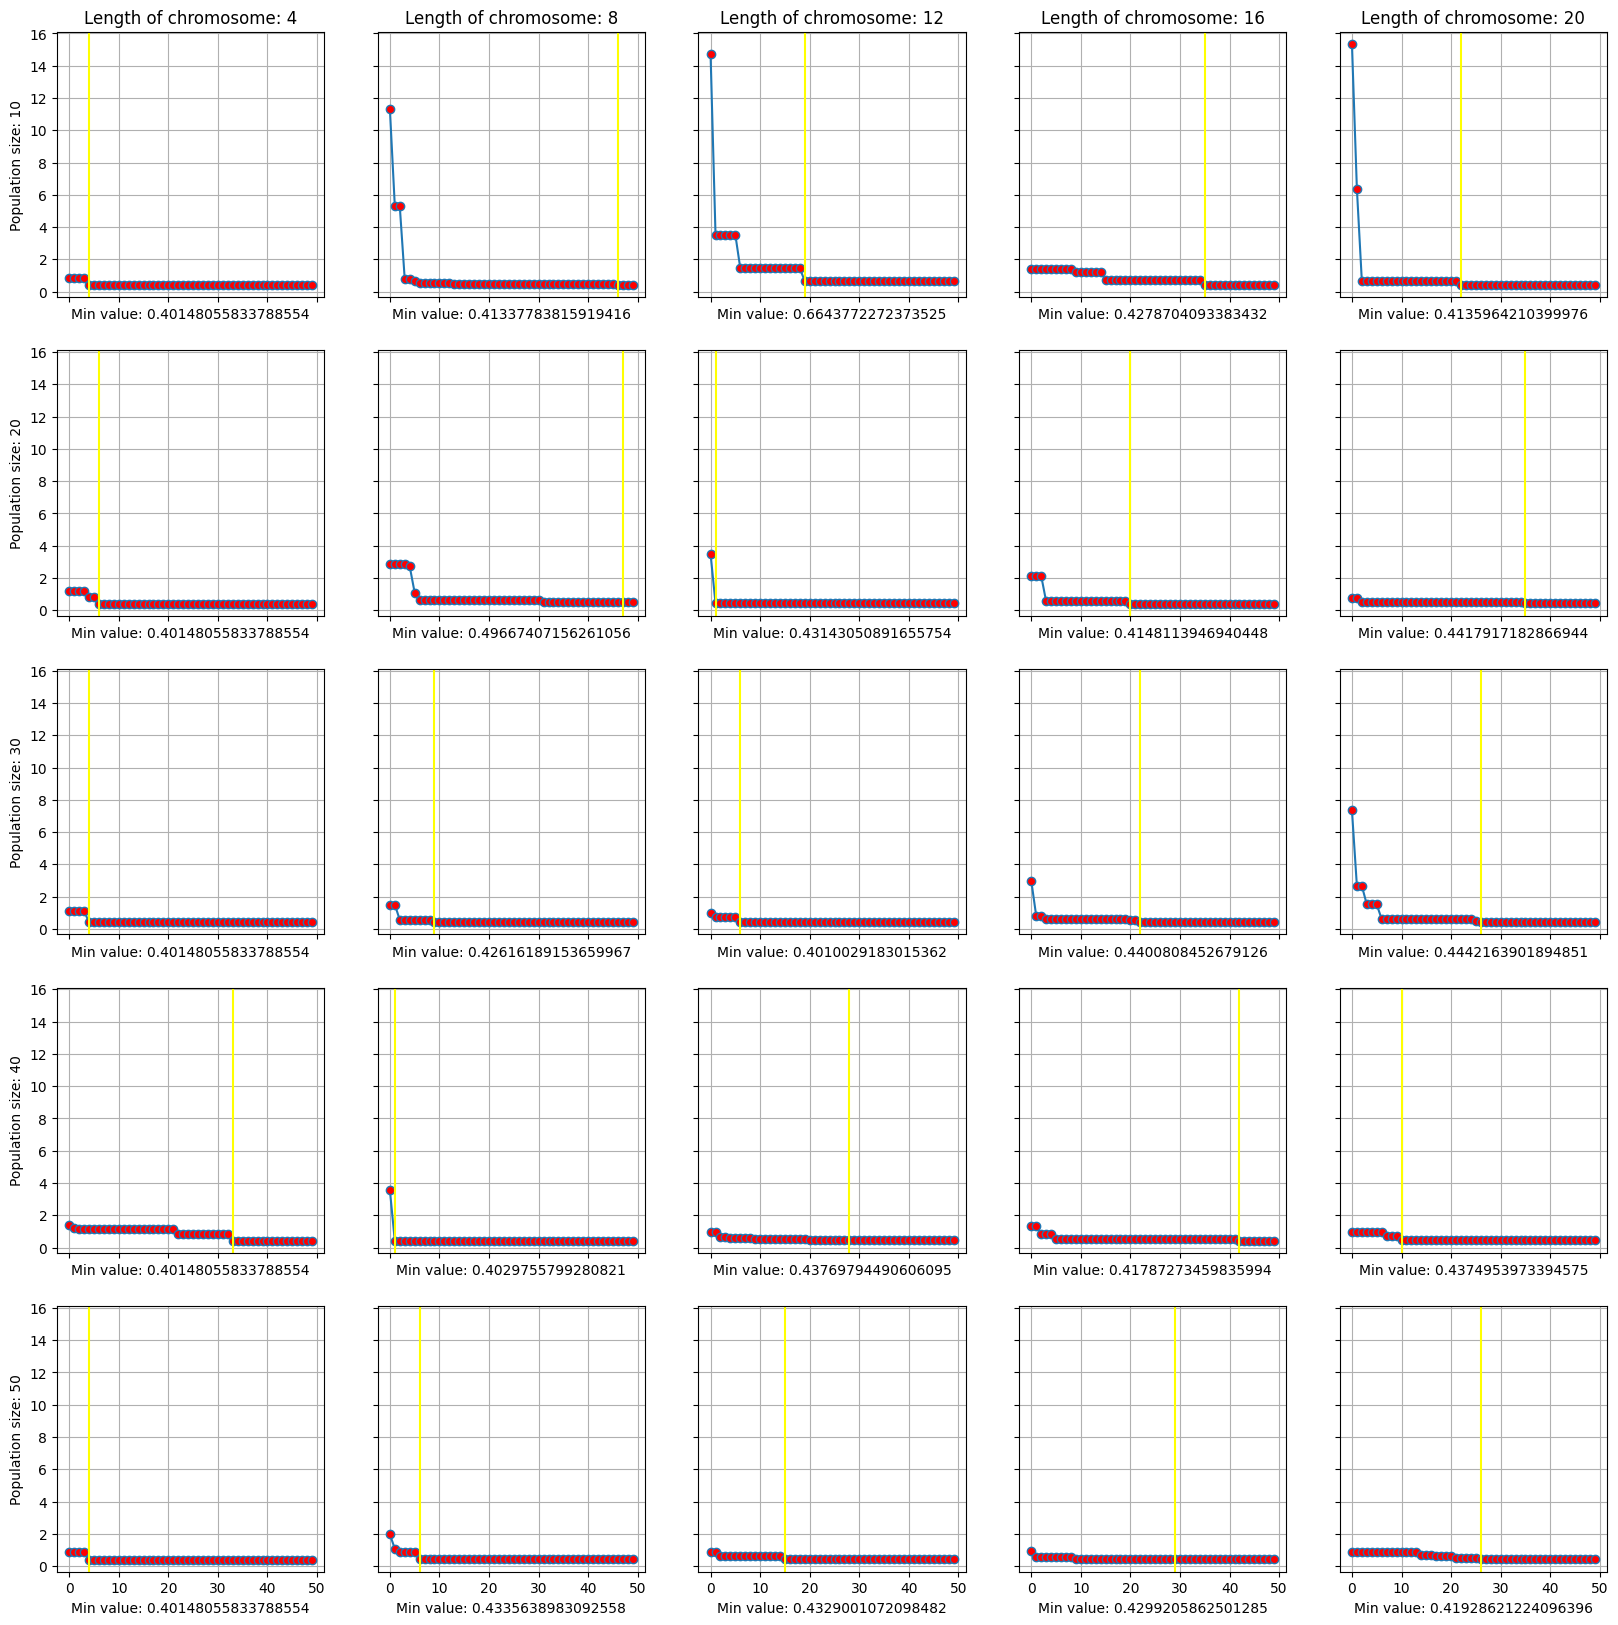

In [148]:
population_sizes = [10, 20, 30, 40, 50]
chromosome_lengths = [4, 8, 12, 16, 20]
generations = 50
mutation_rate = 0.5
a1 = -5
b1 = 10
a2 = 0
b2 = 15

fig, axs = plt.subplots(5, 5, figsize=(20, 20), sharex=True, sharey=True)

for ps in range(5):
        for cl in range(5):
                bf = genetic_algorithm(population_sizes[ps], chromosome_lengths[cl], generations, mutation_rate, Branin_Function, a1, b1, a2, b2, search_minimum=True)
                axs[ps][cl].grid()
                axs[ps][cl].plot(list(range(generations)), bf, marker = "o", mfc="r")
                axs[ps][cl].axvline(x = bf.index(min(bf)), color="yellow")
                axs[ps][cl].set_xlabel(f"Min value: {min(bf)}")
                if cl == 0:
                        axs[ps][cl].set_ylabel(f"Population size: {population_sizes[ps]}")
                if ps == 0:
                        axs[ps][cl].set_title(f"Length of chromosome: {chromosome_lengths[cl]}")

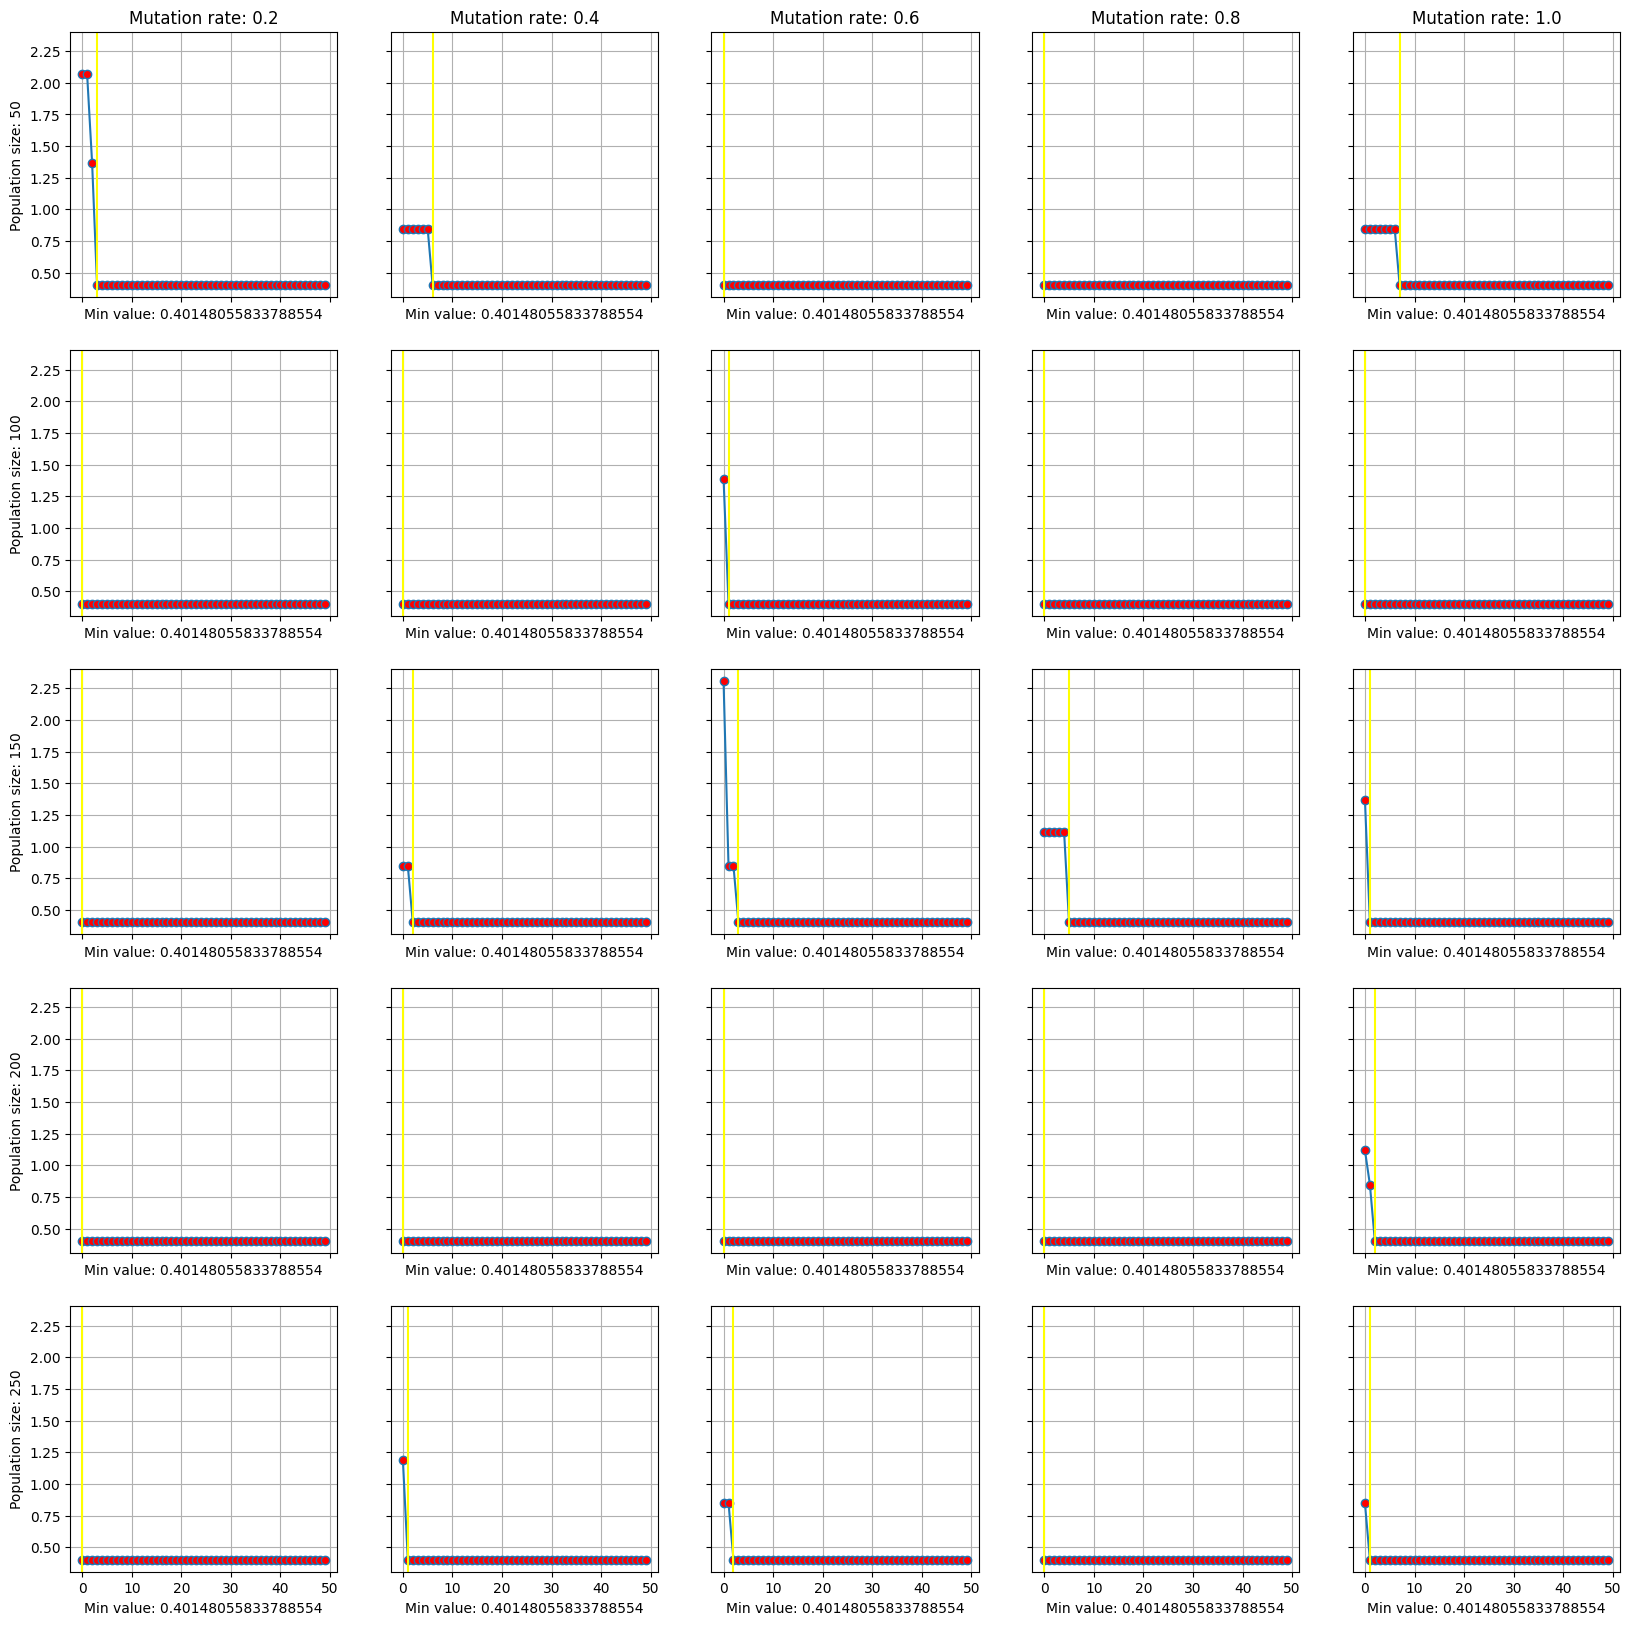

In [171]:
population_size = [10, 20, 30, 40, 50]
chromosome_length = 4
generations = 50
mutation_rates = [0.2, 0.4, 0.6, 0.8, 1.]
a1 = -5
b1 = 10
a2 = 0
b2 = 15

fig, axs = plt.subplots(5, 5, figsize=(20, 20), sharex=True, sharey=True)

for ps in range(5):
    for mr in range(5):
        bf = genetic_algorithm(population_sizes[ps], chromosome_length, generations, mutation_rates[mr], Branin_Function, a1, b1, a2, b2, search_minimum=True)
        axs[ps][mr].grid()
        axs[ps][mr].plot(list(range(generations)), bf, marker = "o", mfc="r")
        axs[ps][mr].axvline(x = bf.index(min(bf)), color="yellow")
        axs[ps][mr].set_xlabel(f"Min value: {min(bf)}")
        if mr == 0:
                axs[ps][mr].set_ylabel(f"Population size: {population_sizes[ps]}")
        if ps == 0:
                axs[ps][mr].set_title(f"Mutation rate: {mutation_rates[mr]}")

In [155]:
genetic_algorithm(30, 4, 50, 0.6, Branin_Function, a1, b1, a2, b2, save_gif=True, search_minimum=True)
display()

C:\Users\berku\AppData\Local\Temp\ipykernel_2176\964581061.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


### Easom

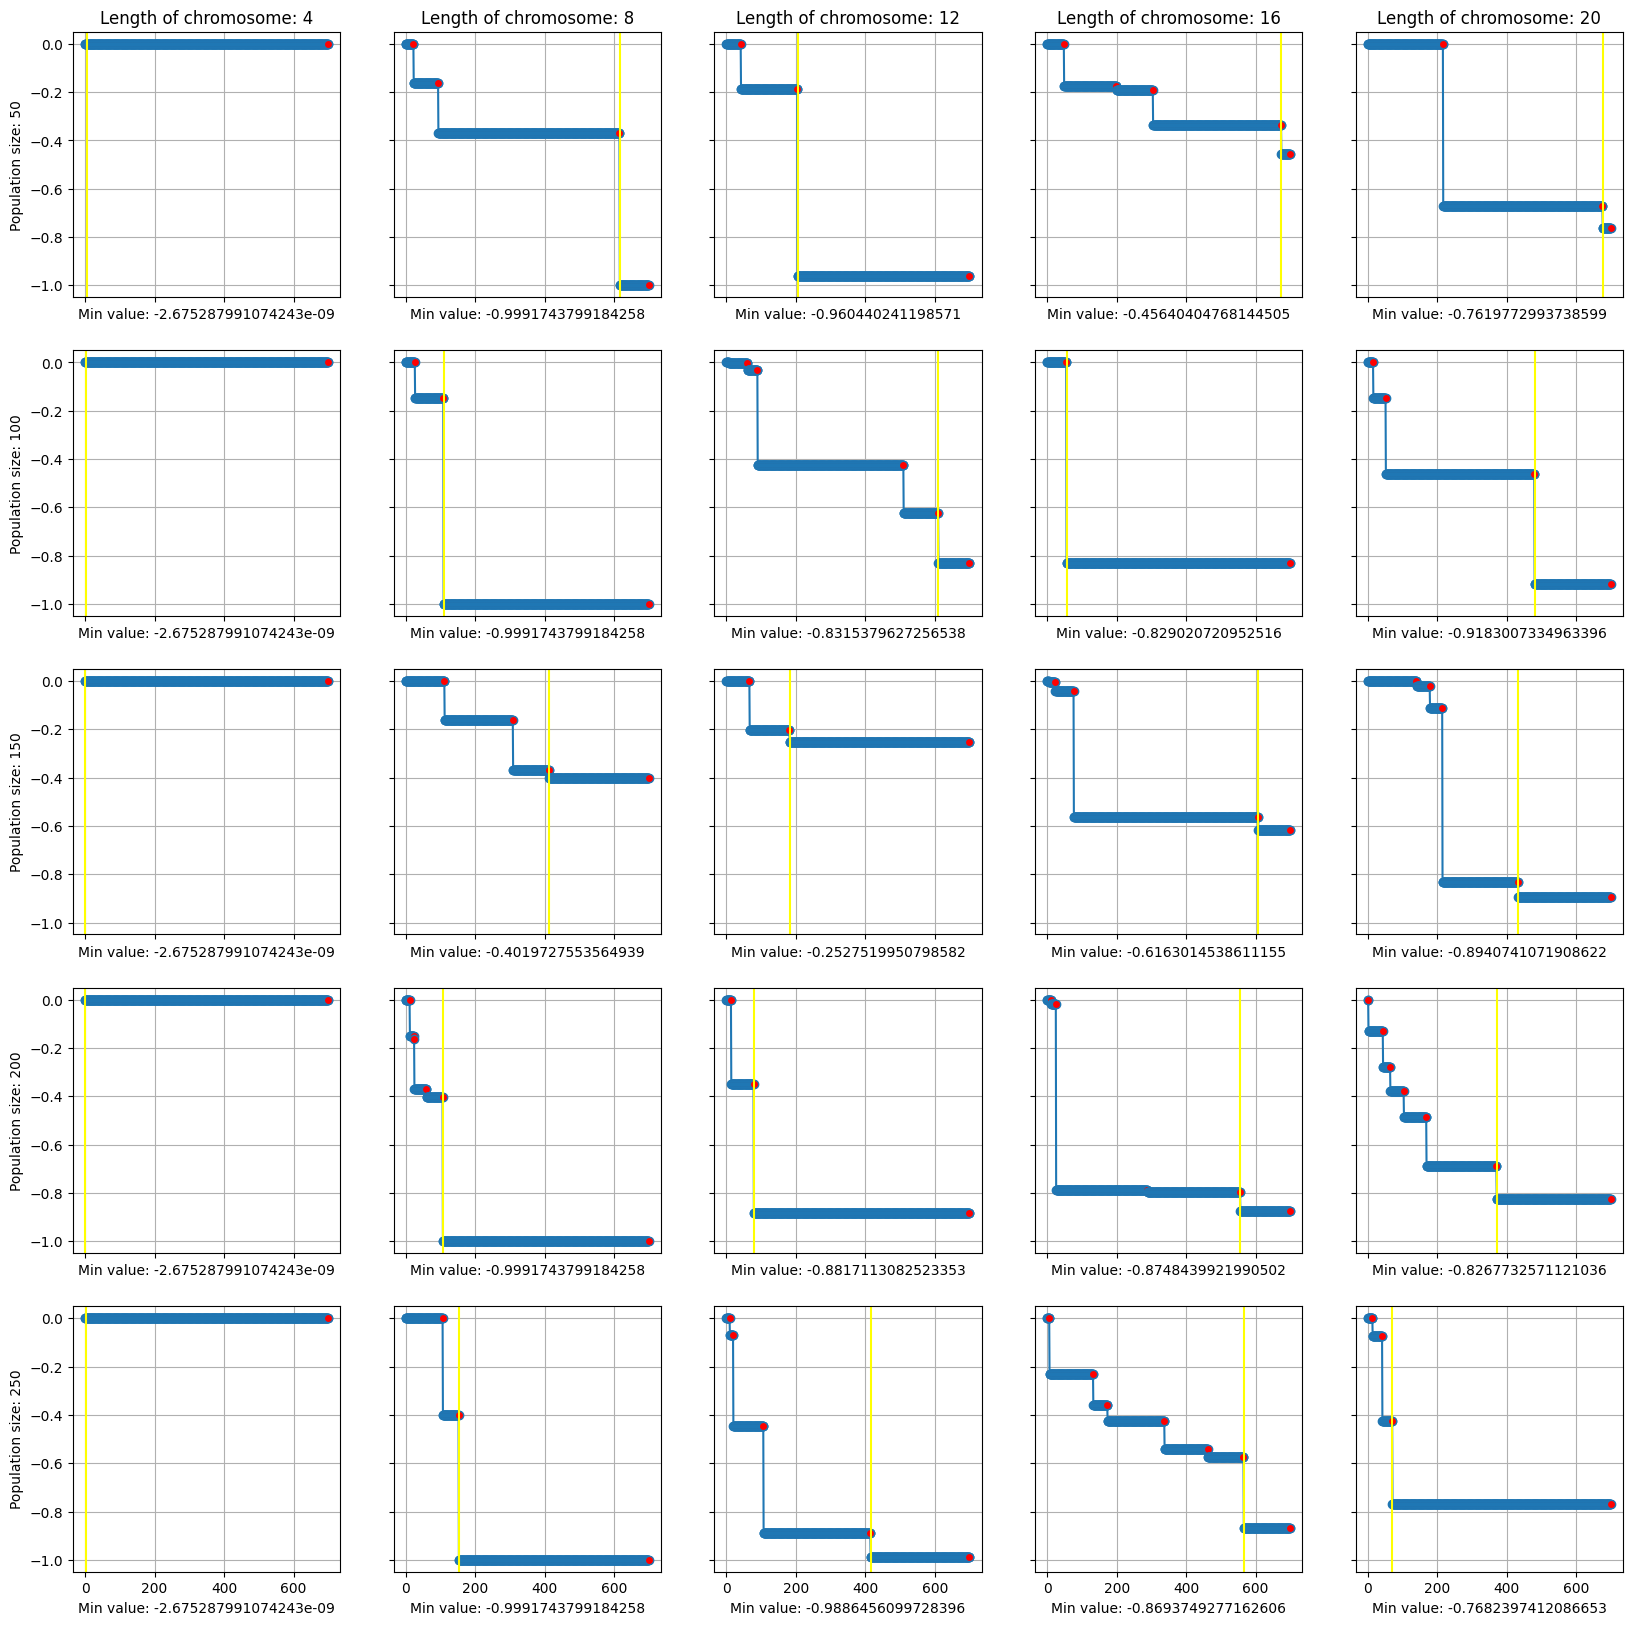

In [162]:
population_sizes = [50, 100, 150, 200, 250]
chromosome_lengths = [4, 8, 12, 16, 20]
generations = 700
mutation_rate = 0.5
a = -100
b = 100

fig, axs = plt.subplots(5, 5, figsize=(20, 20), sharex=True, sharey=True)

for ps in range(5):
        for cl in range(5):
                bf = genetic_algorithm(population_sizes[ps], chromosome_lengths[cl], generations, mutation_rate, Easom_Function, a, b, a, b, search_minimum=True)
                axs[ps][cl].grid()
                axs[ps][cl].plot(list(range(generations)), bf, marker = "o", mfc="r")
                axs[ps][cl].axvline(x = bf.index(min(bf)), color="yellow")
                axs[ps][cl].set_xlabel(f"Min value: {min(bf)}")
                if cl == 0:
                        axs[ps][cl].set_ylabel(f"Population size: {population_sizes[ps]}")
                if ps == 0:
                        axs[ps][cl].set_title(f"Length of chromosome: {chromosome_lengths[cl]}")

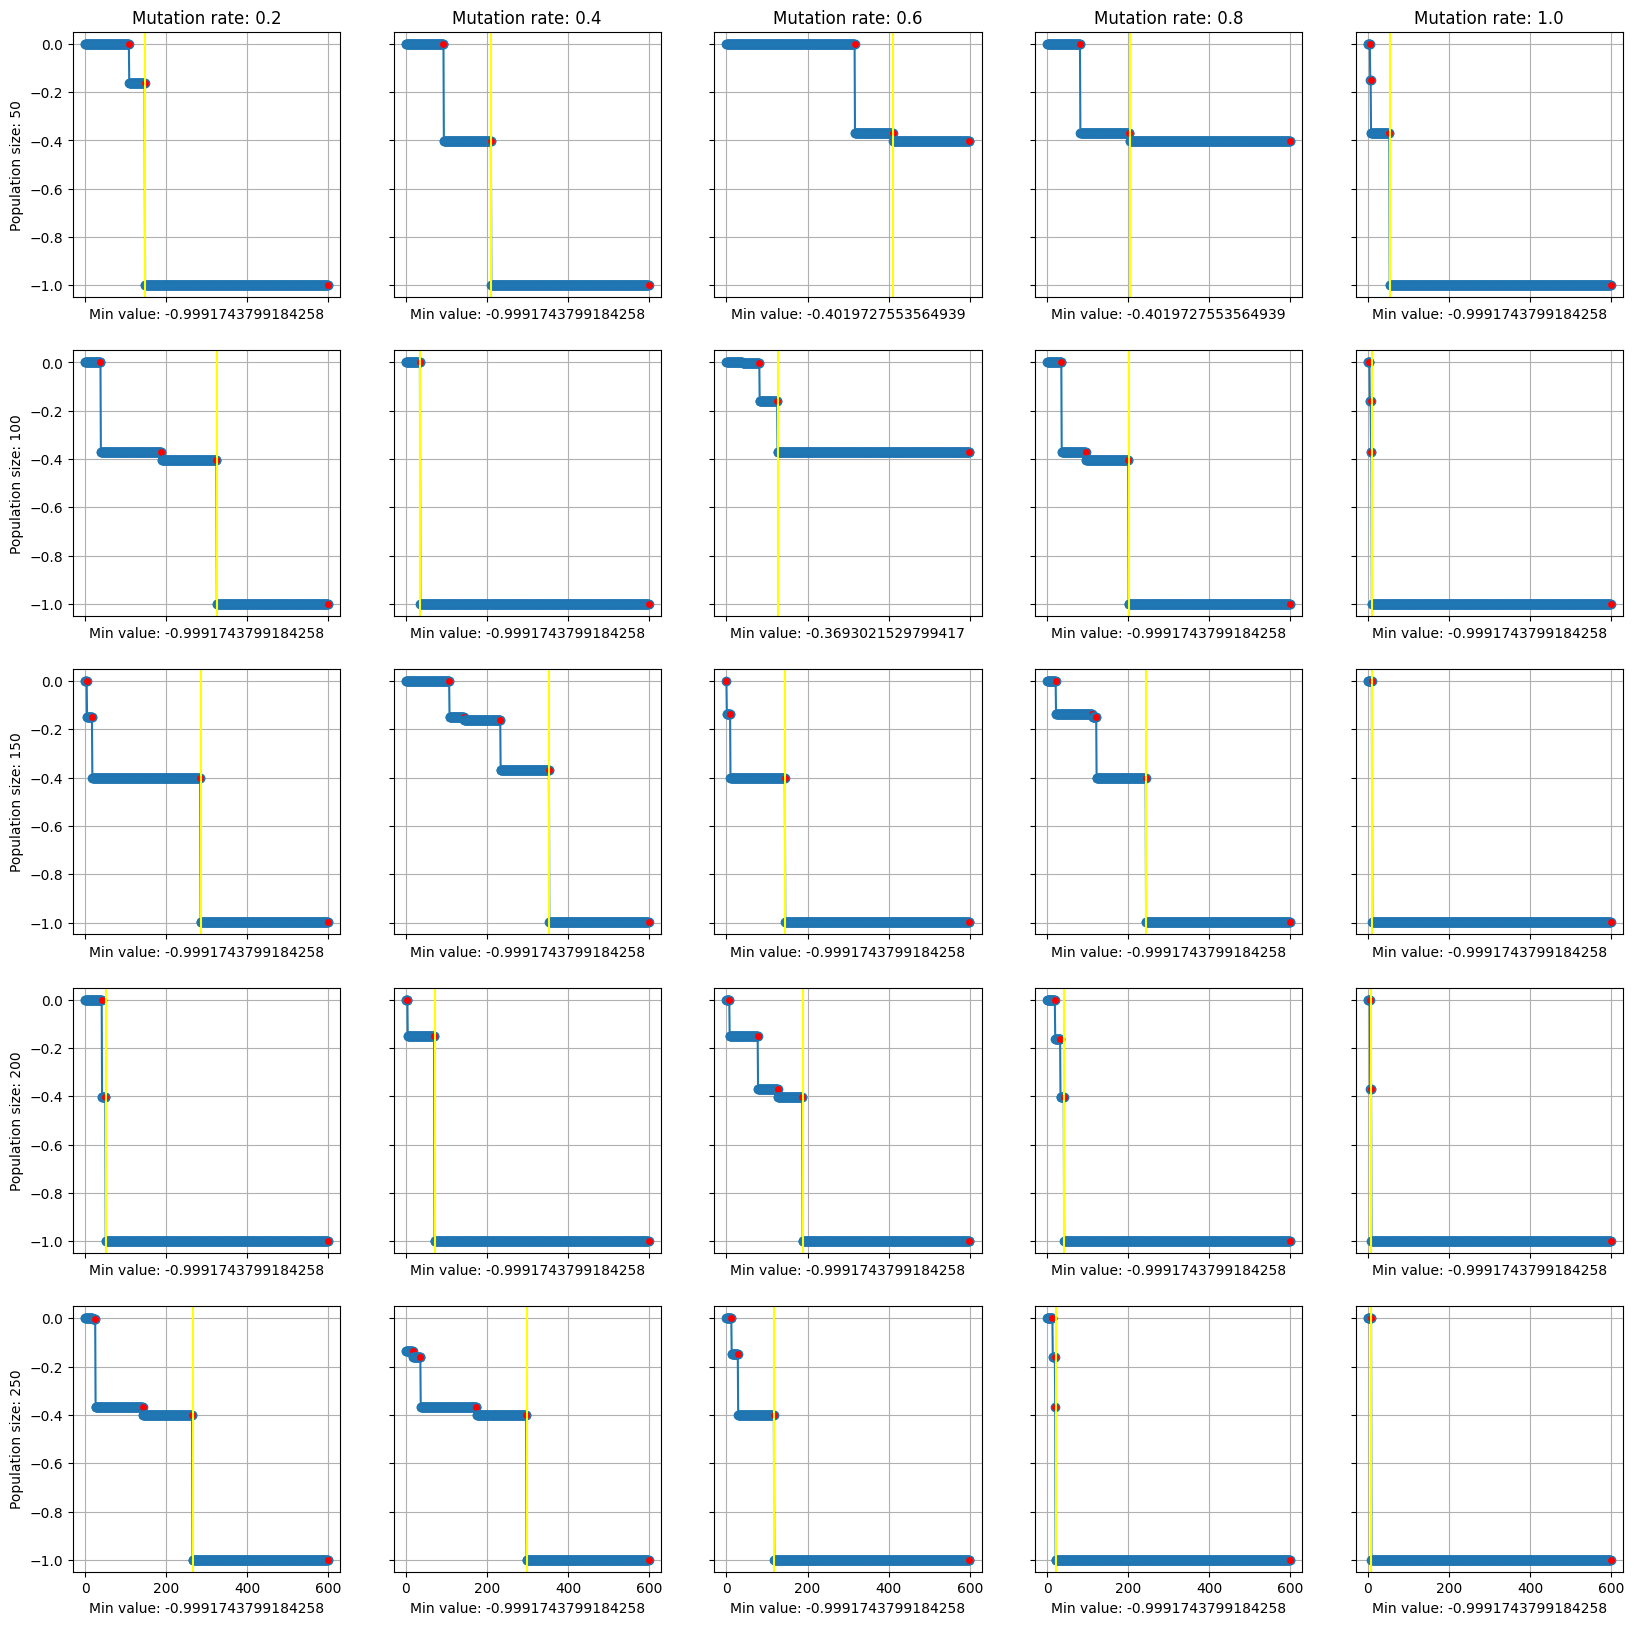

In [163]:
population_size = [50, 100, 150, 200, 250]
chromosome_length = 8
generations = 600
mutation_rates = [0.2, 0.4, 0.6, 0.8, 1.]

fig, axs = plt.subplots(5, 5, figsize=(20, 20), sharex=True, sharey=True)

for ps in range(5):
    for mr in range(5):
        bf = genetic_algorithm(population_sizes[ps], chromosome_length, generations, mutation_rates[mr], Easom_Function, a, b, a, b, search_minimum=True)
        axs[ps][mr].grid()
        axs[ps][mr].plot(list(range(generations)), bf, marker = "o", mfc="r")
        axs[ps][mr].axvline(x = bf.index(min(bf)), color="yellow")
        axs[ps][mr].set_xlabel(f"Min value: {min(bf)}")
        if mr == 0:
                axs[ps][mr].set_ylabel(f"Population size: {population_sizes[ps]}")
        if ps == 0:
                axs[ps][mr].set_title(f"Mutation rate: {mutation_rates[mr]}")

In [168]:
genetic_algorithm(200, 8, 600, 1, Easom_Function, a, b, a, b, save_gif=True, search_minimum=True, fps=20)

C:\Users\berku\AppData\Local\Temp\ipykernel_2176\1430928962.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


[np.float64(-7.766626917354229e-35),
 np.float64(-7.766626917354229e-35),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.float64(-0.9991743799184258),
 np.floa

### Goldstein-Price

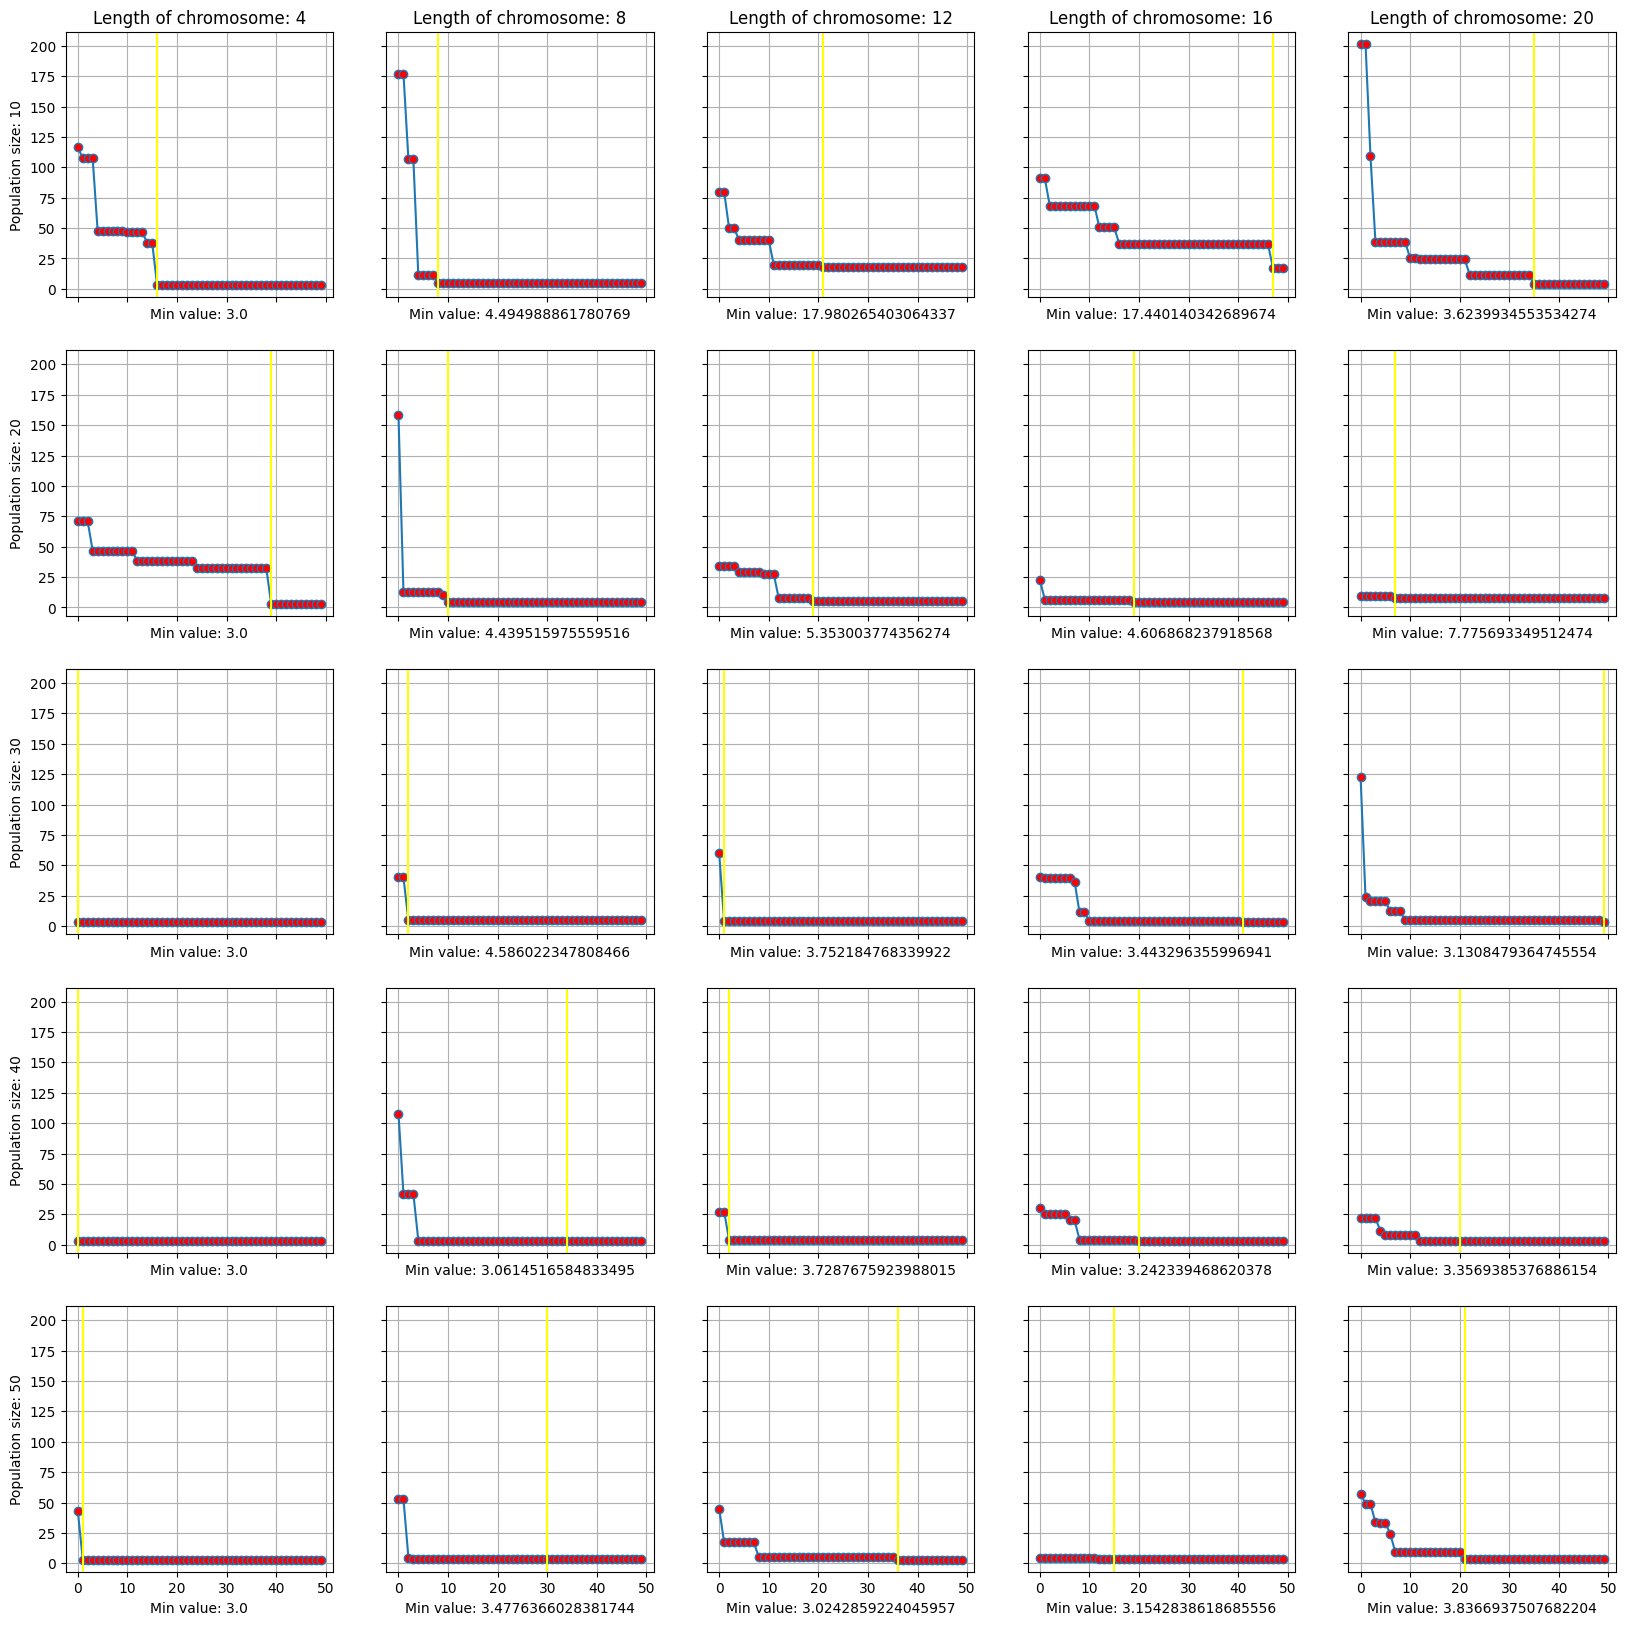

In [ ]:
population_sizes = [10, 20, 30, 40, 50]
chromosome_lengths = [4, 8, 12, 16, 20]
generations = 50
mutation_rate = 0.5
a = -2
b = 2

fig, axs = plt.subplots(5, 5, figsize=(20, 20), sharex=True, sharey=True)

for ps in range(5):
        for cl in range(5):
                bf = genetic_algorithm(population_sizes[ps], chromosome_lengths[cl], generations, mutation_rate, GP_Function, a, b, a, b, search_minimum=True)
                axs[ps][cl].grid()
                axs[ps][cl].plot(list(range(generations)), bf, marker = "o", mfc="r")
                axs[ps][cl].axvline(x = bf.index(min(bf)), color="yellow")
                axs[ps][cl].set_xlabel(f"Min value: {min(bf)}")
                if cl == 0:
                        axs[ps][cl].set_ylabel(f"Population size: {population_sizes[ps]}")
                if ps == 0:
                        axs[ps][cl].set_title(f"Length of chromosome: {chromosome_lengths[cl]}")


Довжина 4 для хромосоми є цілком достатньою. Кожен експеремент досягає свого мінімуму до 50 ітерації. Дослідимо зміну ймовірності мутації

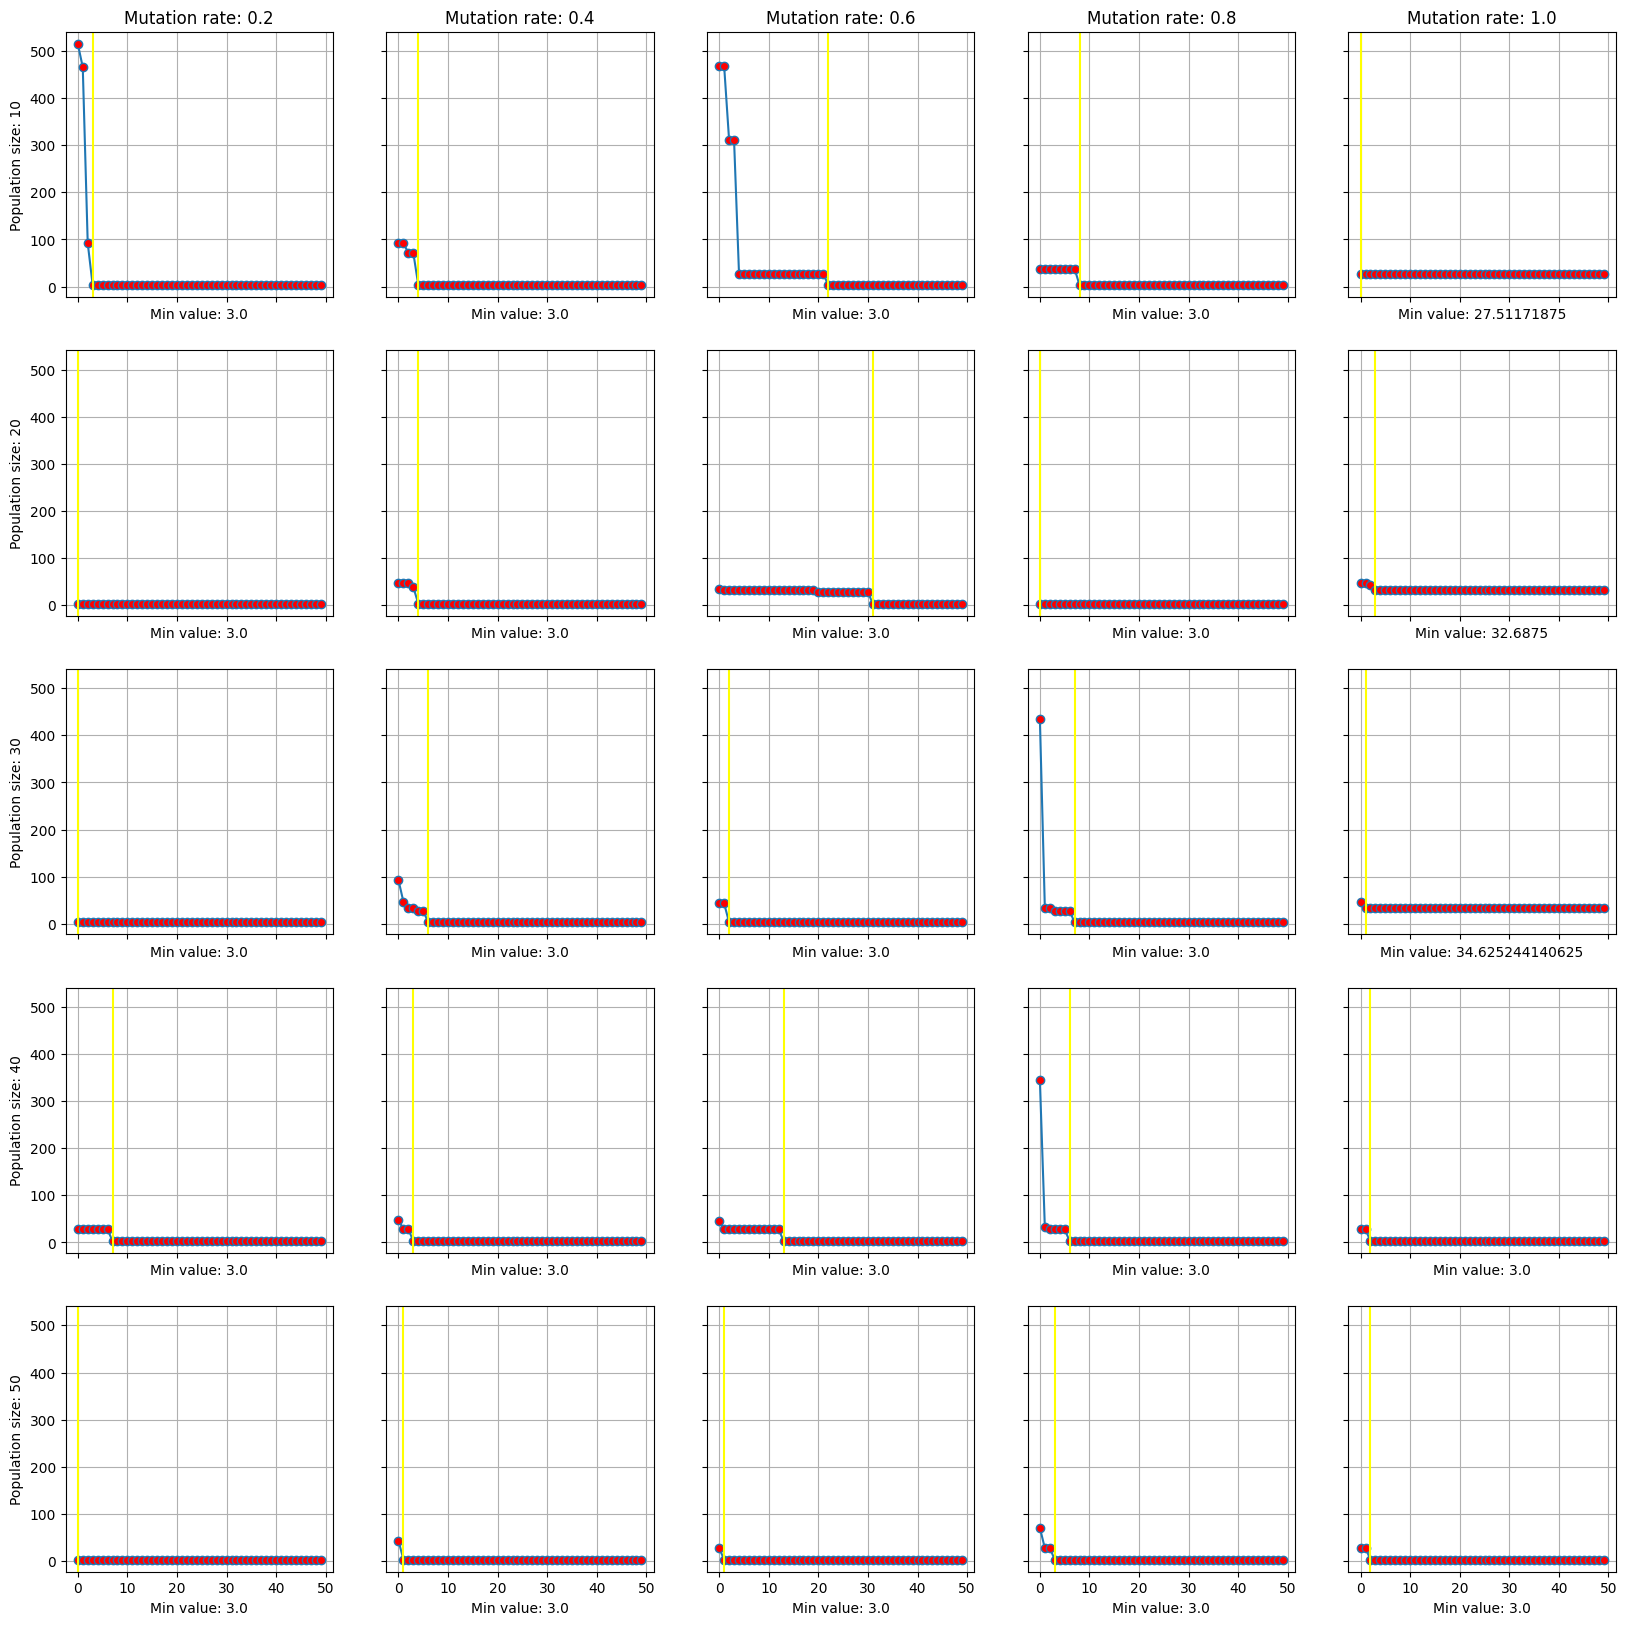

In [129]:
population_size = [10, 20, 30, 40, 50]
chromosome_length = 4
generations = 50
mutation_rates = [0.2, 0.4, 0.6, 0.8, 1.]
a = -2
b = 2

fig, axs = plt.subplots(5, 5, figsize=(20, 20), sharex=True, sharey=True)

for ps in range(5):
    for mr in range(5):
        bf = genetic_algorithm(population_sizes[ps], chromosome_length, generations, mutation_rates[mr], GP_Function, a, b, a, b, search_minimum=True)
        axs[ps][mr].grid()
        axs[ps][mr].plot(list(range(generations)), bf, marker = "o", mfc="r")
        axs[ps][mr].axvline(x = bf.index(min(bf)), color="yellow")
        axs[ps][mr].set_xlabel(f"Min value: {min(bf)}")
        if mr == 0:
                axs[ps][mr].set_ylabel(f"Population size: {population_sizes[ps]}")
        if ps == 0:
                axs[ps][mr].set_title(f"Mutation rate: {mutation_rates[mr]}")

In [181]:
genetic_algorithm(10, 4, 50, 0.4, GP_Function, a, b, a, b, save_gif=True, search_minimum=True)
display()

C:\Users\berku\AppData\Local\Temp\ipykernel_2176\1430928962.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


### six-hump Camel

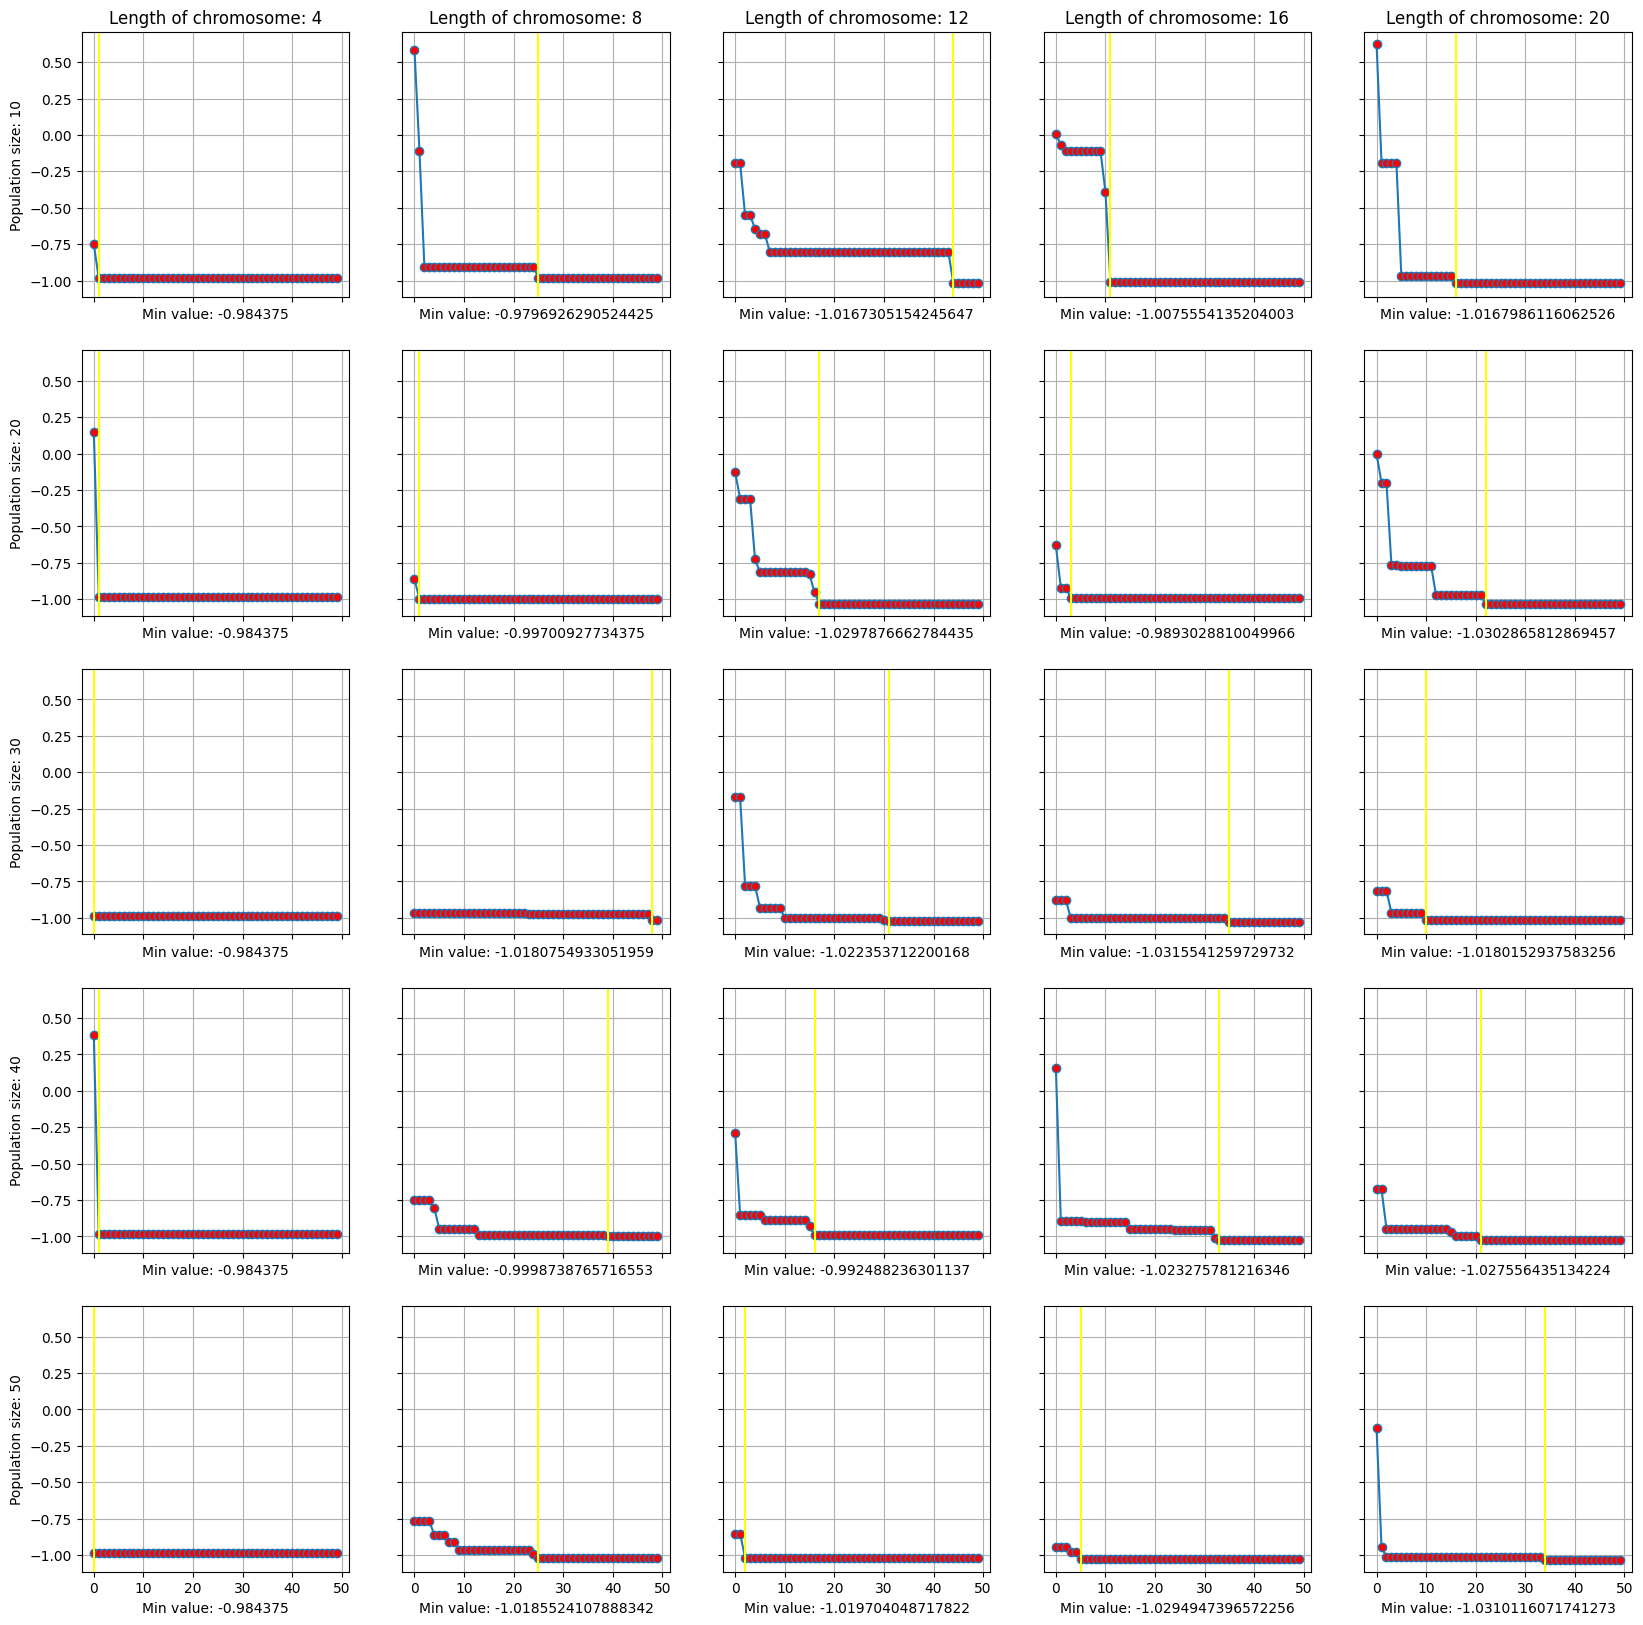

In [183]:
population_sizes = [10, 20, 30, 40, 50]
chromosome_lengths = [4, 8, 12, 16, 20]
generations = 50
mutation_rate = 0.5
a1, b1 = -3, 3
a2, b2 = -2, 2

fig, axs = plt.subplots(5, 5, figsize=(20, 20), sharex=True, sharey=True)

for ps in range(5):
        for cl in range(5):
                bf = genetic_algorithm(population_sizes[ps], chromosome_lengths[cl], generations, mutation_rate, shC_Function, a1, b1, a2, b2, search_minimum=True)
                axs[ps][cl].grid()
                axs[ps][cl].plot(list(range(generations)), bf, marker = "o", mfc="r")
                axs[ps][cl].axvline(x = bf.index(min(bf)), color="yellow")
                axs[ps][cl].set_xlabel(f"Min value: {min(bf)}")
                if cl == 0:
                        axs[ps][cl].set_ylabel(f"Population size: {population_sizes[ps]}")
                if ps == 0:
                        axs[ps][cl].set_title(f"Length of chromosome: {chromosome_lengths[cl]}")

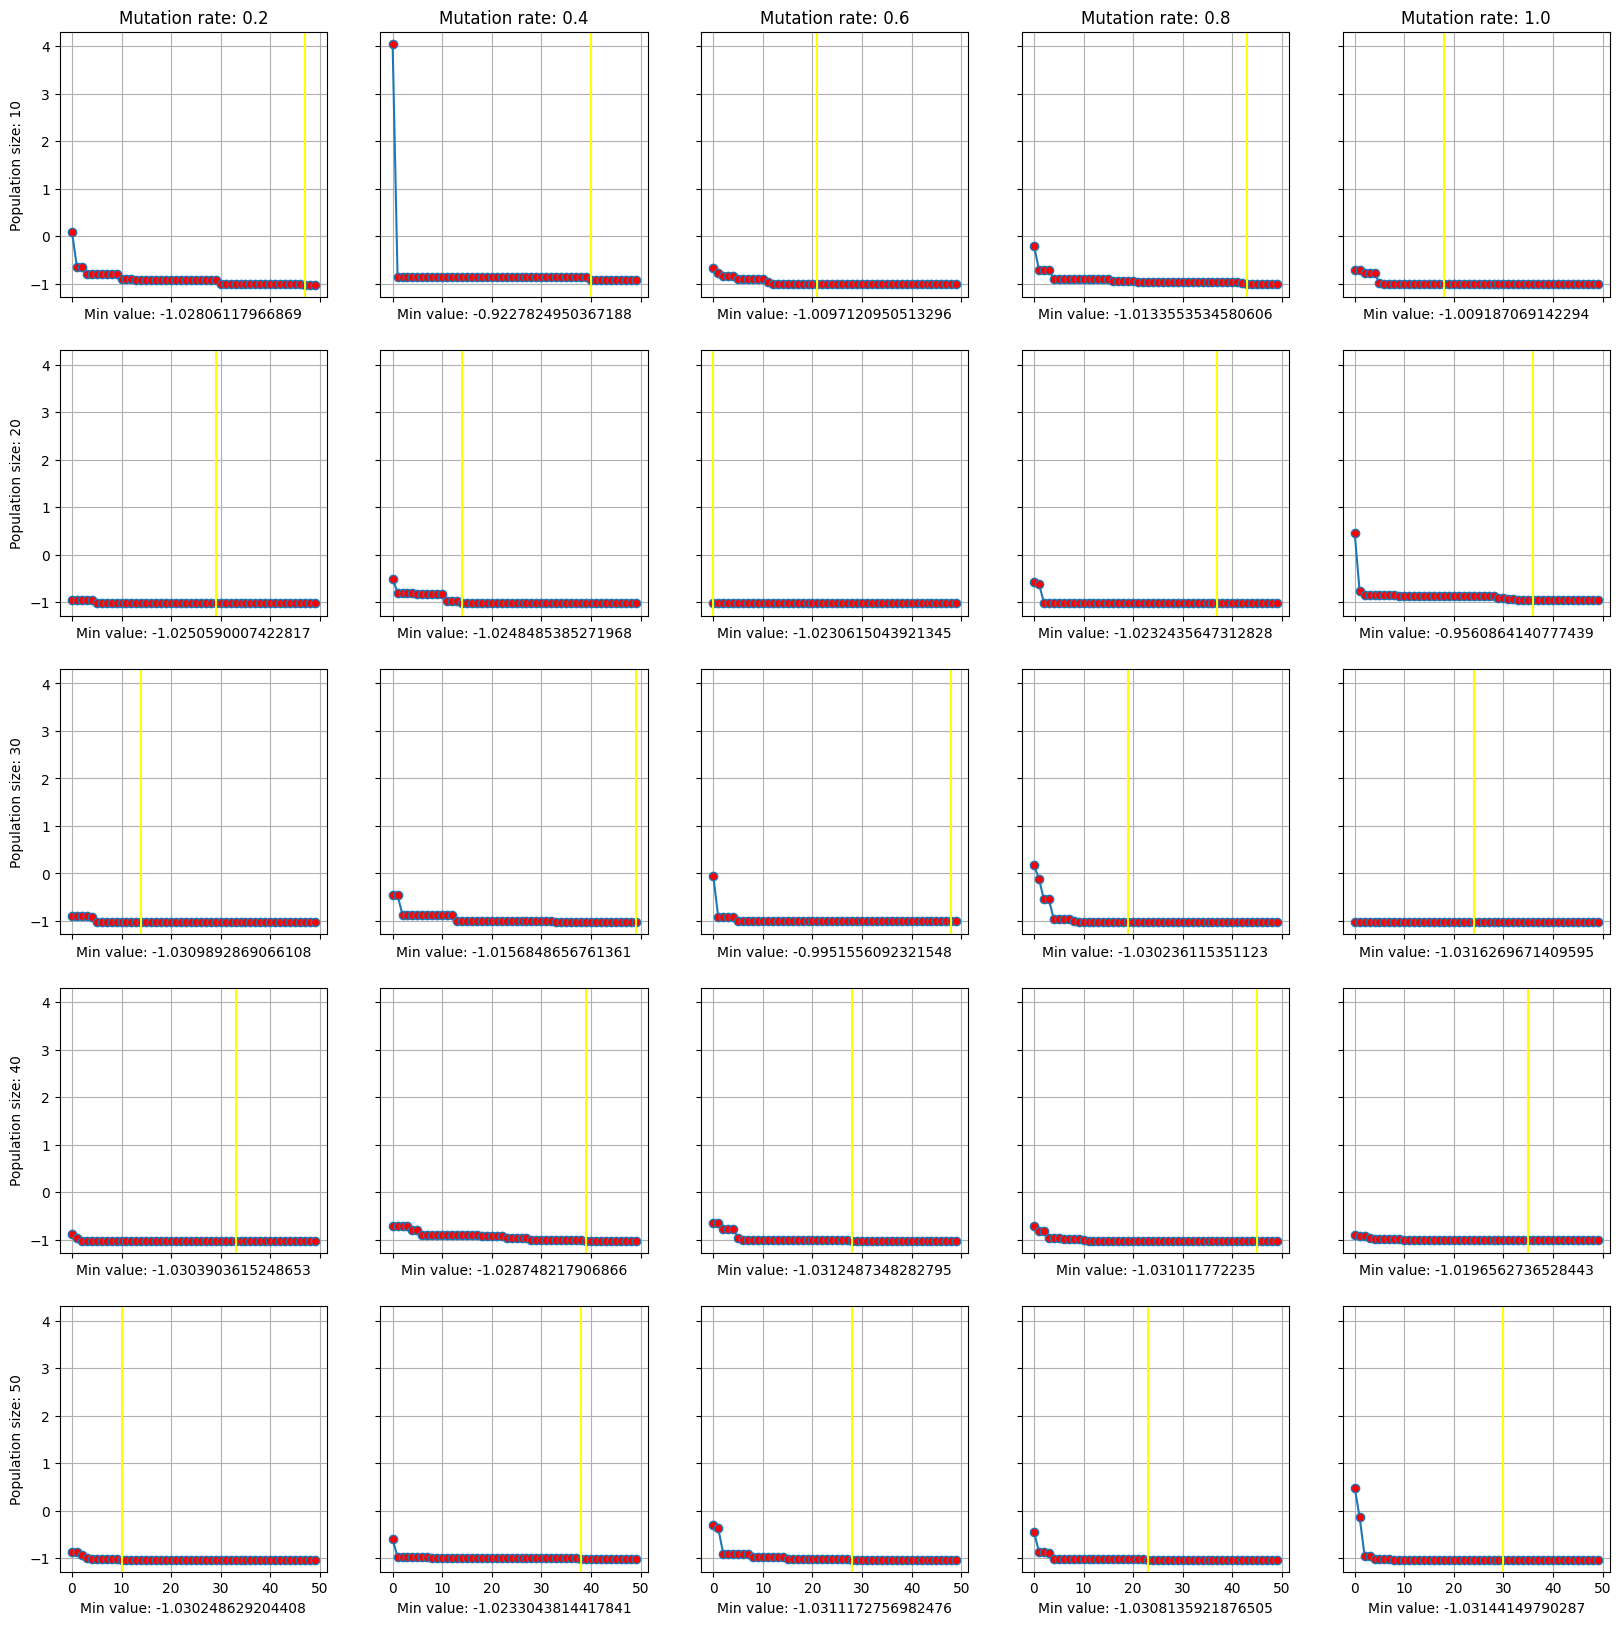

In [185]:
population_size = [10, 20, 30, 40, 50]
chromosome_length = 16
generations = 50
mutation_rates = [0.2, 0.4, 0.6, 0.8, 1.]

fig, axs = plt.subplots(5, 5, figsize=(20, 20), sharex=True, sharey=True)

for ps in range(5):
    for mr in range(5):
        bf = genetic_algorithm(population_sizes[ps], chromosome_length, generations, mutation_rates[mr], shC_Function, a1, b1, a2, b2, search_minimum=True)
        axs[ps][mr].grid()
        axs[ps][mr].plot(list(range(generations)), bf, marker = "o", mfc="r")
        axs[ps][mr].axvline(x = bf.index(min(bf)), color="yellow")
        axs[ps][mr].set_xlabel(f"Min value: {min(bf)}")
        if mr == 0:
                axs[ps][mr].set_ylabel(f"Population size: {population_sizes[ps]}")
        if ps == 0:
                axs[ps][mr].set_title(f"Mutation rate: {mutation_rates[mr]}")

In [186]:
genetic_algorithm(50, 16, 50, 0.6, shC_Function, a1, b1, a2, b2, save_gif=True, search_minimum=True)

C:\Users\berku\AppData\Local\Temp\ipykernel_2176\1430928962.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


[np.float64(-0.4192429899365362),
 np.float64(-0.7421749645233927),
 np.float64(-0.764068594871788),
 np.float64(-0.9123847961752427),
 np.float64(-0.9123847961752427),
 np.float64(-0.9395445328055112),
 np.float64(-0.9395445328055112),
 np.float64(-0.9395445328055112),
 np.float64(-0.9395445328055112),
 np.float64(-0.9395445328055112),
 np.float64(-0.955809080011242),
 np.float64(-0.955809080011242),
 np.float64(-0.955809080011242),
 np.float64(-0.955809080011242),
 np.float64(-0.955809080011242),
 np.float64(-0.955809080011242),
 np.float64(-0.9720760875949079),
 np.float64(-0.9720760875949079),
 np.float64(-0.9720760875949079),
 np.float64(-0.9720760875949079),
 np.float64(-1.0104753890561886),
 np.float64(-1.0104753890561886),
 np.float64(-1.0104753890561886),
 np.float64(-1.0104753890561886),
 np.float64(-1.0104753890561886),
 np.float64(-1.0104753890561886),
 np.float64(-1.0104753890561886),
 np.float64(-1.0104753890561886),
 np.float64(-1.0104753890561886),
 np.float64(-1.010475